# Solving Transcendental Equations using fsolve()
*March 19, 2021*

- First import some required modules

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

The transcendental equation that we will solve in this example is:

$\ln\left(\dfrac{\dot{Q}RT}{\dot{V}P_0L_\mathrm{m}}\right) = \dfrac{L_\mathrm{m}}{R}\left(\dfrac{1}{T_0}-\dfrac{1}{T}\right)$

This equation determine the equilibrium temperature of a boiling liquid that is being cooled by evaporative cooling.  It's vapor pressure is reduced via a pump with a pumping speed $\dot{v}$ and the liquid is absorbing a heat load of $\dot{Q}$ from its surroundings.

The dependence of the boiling temperature on the vapor pressure is determined from the Calusius-Clapeyron relation.  The liquid has an equilibrium temperature of $T_0$ when the vapor pressure is $P_0$.
> $R$ is the universal gas constant<br>
$L_\mathrm{m}$ is the molar latent heat

- Enter some numerical values of the various quantities.  The goal is to find the equilibrium temperature which cannot be solved for analytically.

In [2]:
Qdot = 2.5 # W
vdot = 1e-3 # m^3/s
Lm = 90 # J/mol
R = 8.31 #J/K mol
P0 = 99.23e3 # Pa
T0 = 4.2 # K

- Create a function which defines our transcendental equaition.  We want to find $T$ that makes "Fcn(T)" equal to zero.

In [3]:
def Fcn(T):
    return np.log(Qdot*R*T/(vdot*P0*Lm)) - (Lm/R)*(1/T0 - 1/T)

 - We use *fsolve()* to find $T$.  *fsolve()* requires two arguments.  The first is the function that we defined and the second is an initial guess at the solution.  If your guess is too far from the actual solution, *fsolve()* may return an error.

In [4]:
sol = fsolve(Fcn, 2)
sol

array([1.29141355])

The equilibrium temperature for a heat load of $\dot{Q}=2.5~\mathrm{W}$ and a pumping speed of $\dot{v}=1.0\times 10^{-3}~\mathrm{m}^2/\mathrm{s}$ is $T=1.291~\mathrm{K}$.

We can look to see if this solution makes sense.  We do this my plotting the left-hand and right side of the transcendental equation as a function of $T$ on the same graph and look for the intersection.

- First define functions for the LHS & RHS of the transcendental equation.

In [6]:
def LHS(T):
    return np.log(Qdot*R*T/(vdot*P0*Lm))

def RHS(T):
    return (Lm/R)*(1/T0 - 1/T)

- Next, make a list of some temperature values near the solution that *fsolve()* found. 

In [10]:
TT = np.arange(0.9, 1.7, 0.01)

- Now, plot the two curves and visually inspect the intersection.

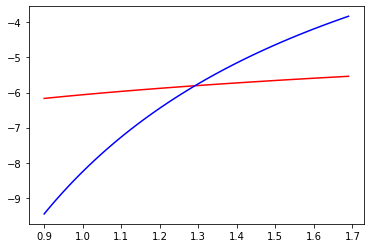

In [11]:
plt.plot(TT, LHS(TT), 'r-')
plt.plot(TT, RHS(TT), 'b-');

The intersection appears to be where it was exepcted.  The solution is confirmed!